# TASK 2: CLUSTERING (test #1)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [3]:
df = pd.read_csv(r"csv/seismic_clust.csv", skipinitialspace=True)

In [4]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy,genergy_S,gpuls_S,gdenergy_S,gdpuls_S,energy_S
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,...,9.627734,3.871201,3.218876,3.218876,0.000000,-0.344249,-1.651209,-1.593212,-1.761844,0.000000
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,...,9.596962,3.496508,3.295837,2.890372,7.601402,-0.364671,-1.950436,-1.498307,-2.209817,0.963185
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,...,8.993427,3.401197,2.772589,2.944439,0.000000,-0.765223,-2.026550,-2.143552,-2.136087,0.000000
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,...,10.268825,5.141664,4.304065,4.919981,8.006701,0.081228,-0.636629,-0.255009,0.557908,1.014541
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,...,9.444622,4.043051,3.526361,3.806662,0.000000,-0.465776,-1.513971,-1.214037,-0.960295,0.000000


In [5]:
df.shape

(2578, 25)

## Clustering

### (genergy, gdpuls, energy)

In [6]:
# Selezione attributi da utilizzare nel clustering

df_1 = pd.DataFrame(data = df, columns=['genergy_S', 'gdpuls_S', 'energy_S'])
df_1.head()

,genergy_S,gdpuls_S,energy_S
0,-0.344249,-1.761844,0.000000
1,-0.364671,-2.209817,0.963185
2,-0.765223,-2.136087,0.000000
3,0.081228,0.557908,1.014541
4,-0.465776,-0.960295,0.000000


In [7]:
# calcolo di SSE e Silhouette tra 2 e 51

sse_list = []
silhouette_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_1)
    sse_list.append( kmeans.inertia_ )
    silhouette_list.append(silhouette_score(df_1, kmeans.labels_))

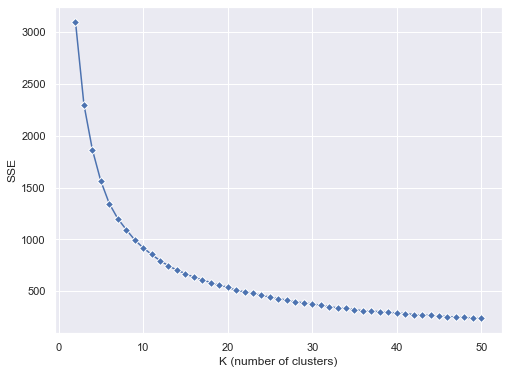

In [8]:
# visualizzazione grafica SSE

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), sse_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('SSE')
plt.show()

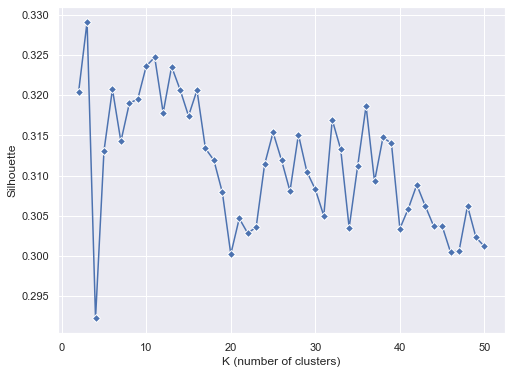

In [9]:
# visualizzazione grafica Silhouette

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), silhouette_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('Silhouette')
plt.show()

In [10]:
# inizializzazione k-means (con metodo k-means++)

kmeans = KMeans( n_clusters=3, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_1)

KMeans(max_iter=100, n_clusters=3)

In [11]:
# stampa dell'array con le assegnazioni record-cluster

kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [12]:
# generazione lista centroidi

centers = kmeans.cluster_centers_
centers

array([[ 1.60303774, -0.00878242,  0.88420197],
       [-0.75804428, -1.07329712,  0.26133525],
       [ 0.02599099,  0.37888483,  0.40956454]])

In [13]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc = df_1.copy(deep=True)
df_1Sc['kmeans.labels_'] = kmeans.labels_

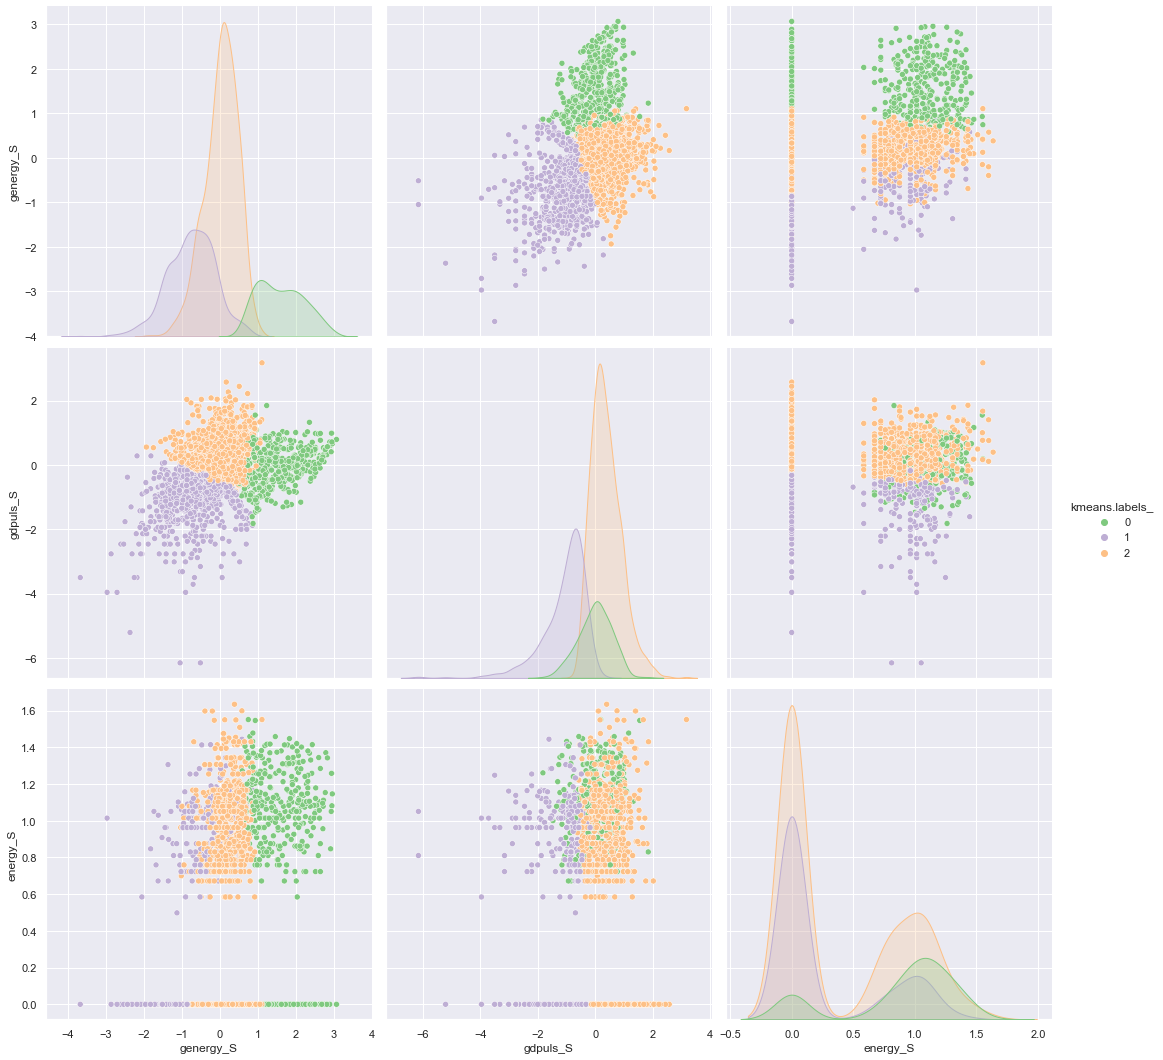

In [14]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='kmeans.labels_', palette = "Accent", height=5)
plt.show()

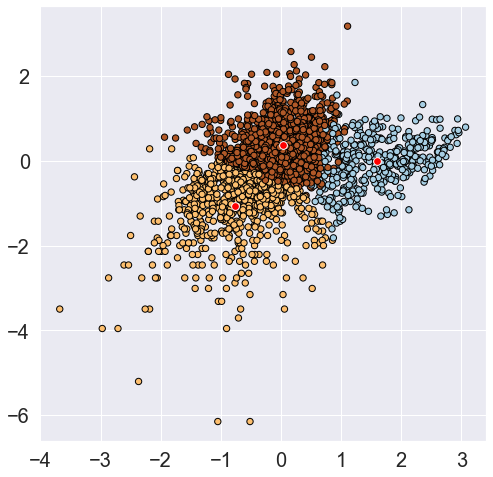

In [15]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= kmeans.labels_, cmap = 'Paired')
plt.scatter( centers[:,0], centers[:,1], c='red', marker='.', s=240, edgecolor='white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

C:\Users\crocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


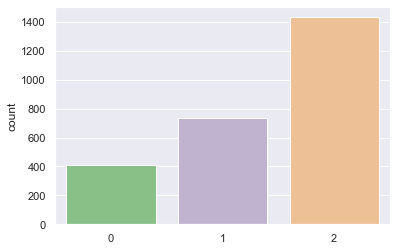

In [16]:
# visualizzazione count plot per ogni cluster

sns.countplot(kmeans.labels_, palette = 'Accent')
plt.show()

In [17]:
# conteggio valori per ogni cluster

np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([ 408,  738, 1432], dtype=int64))

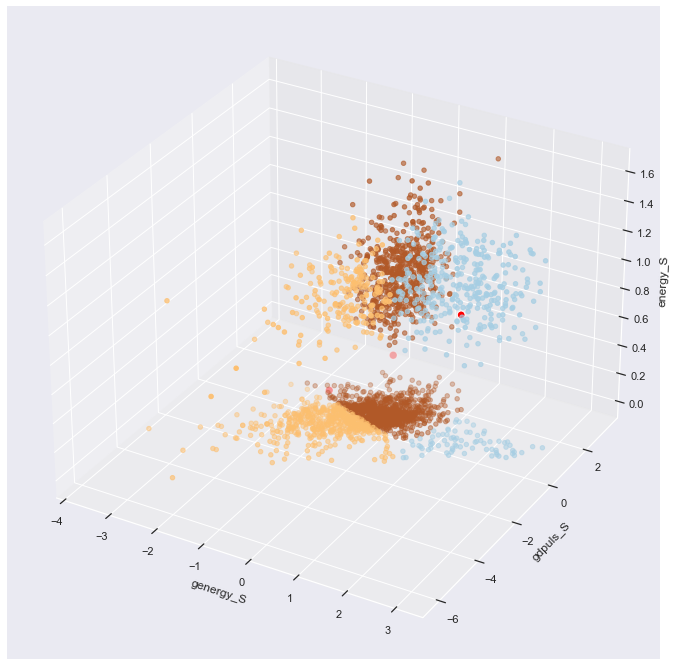

In [18]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = 'energy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap = 'Paired')
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='.', s=240, edgecolor='white' )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

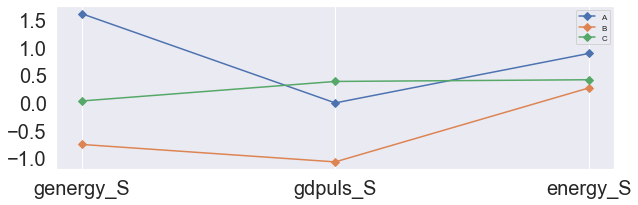

In [19]:
#CAMBIARE COLORI

plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='D', label=clust_name[i])

plt.xticks([0, 1, 2], df_1, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=8, loc='best')
plt.grid(axis='y')

In [20]:
# creazione copia dataframe per visualizzare correlazione con attributo class

df_1C = df_1.copy(deep=True)
df_1C['class'] = df['class']

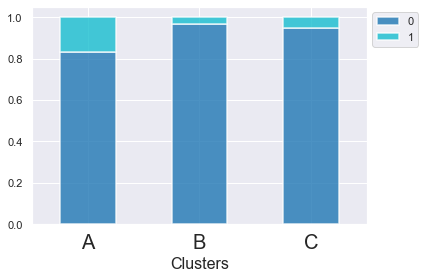

In [21]:
# visualizzazione grafica correlazione elementi clusters con attributo class

df_1C['kmeans_labels'] = kmeans.labels_

bar_pl = df_1C['class'].groupby(df_1C['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [22]:
# valori numerici SSE e Silhouette

print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(df_1, kmeans.labels_))

SSE 2298.4230282906333
Silhouette 0.3282250379998373


## DBScan

#### minsample (D * 2)

In [23]:
# calcolo distanza dbscan con k = 10

dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=10
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

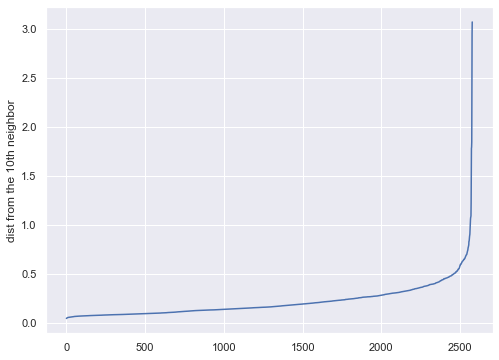

In [24]:
# visualizzazione grafica distanze

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from the '+ str(k) + 'th neighbor')

plt.show()

In [25]:
# inizializzazione dbscan

dbscan = DBSCAN( eps=0.55, min_samples=50)
dbscan.fit(df_1)

DBSCAN(eps=0.55, min_samples=50)

In [26]:
# stampa dell'array con le assegnazioni record-cluster

dbscan.labels_

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [27]:
# stampa lista cluster e lista elementi di ogni cluster

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 186, 1037, 1355], dtype=int64))

In [28]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc['dbscan.labels_'] = dbscan.labels_

C:\Users\crocc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


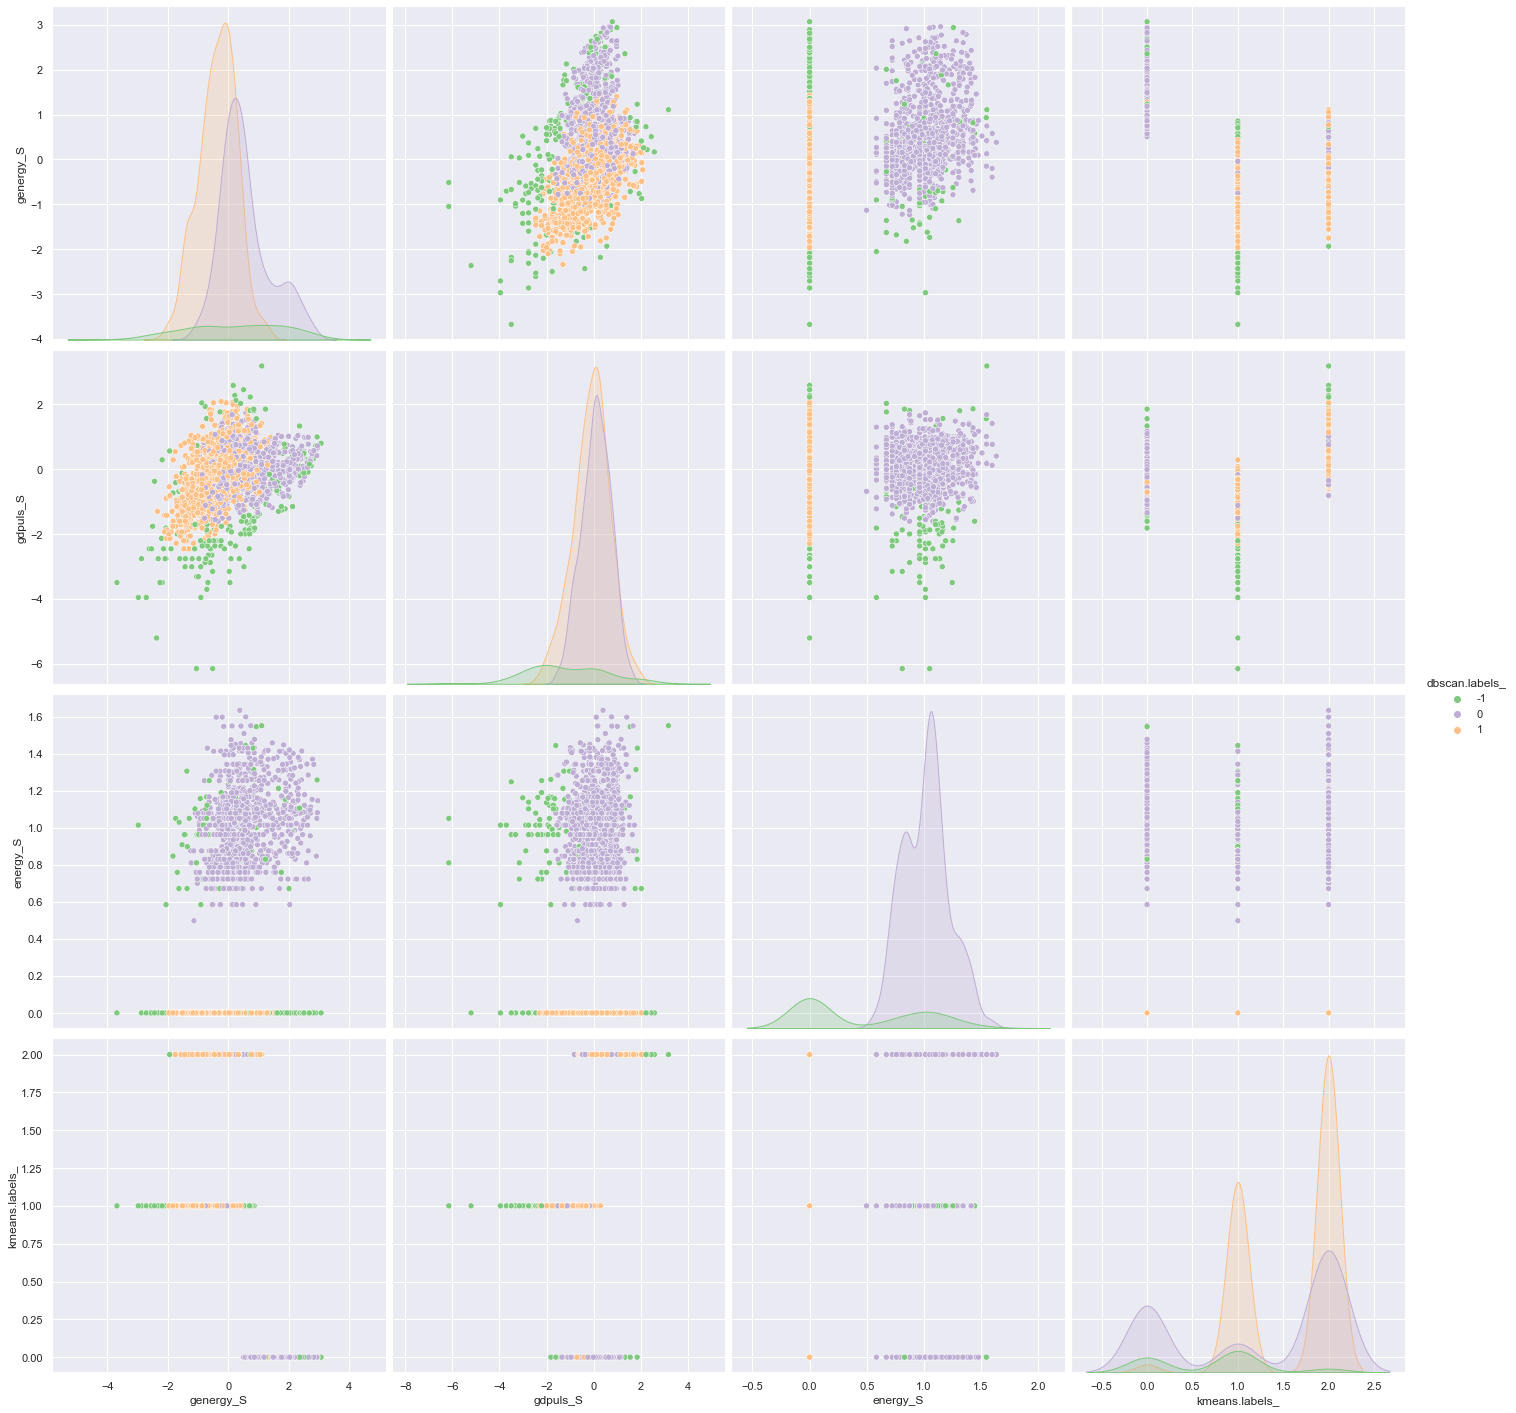

In [29]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='dbscan.labels_', palette = "Accent", height=5)
plt.show()

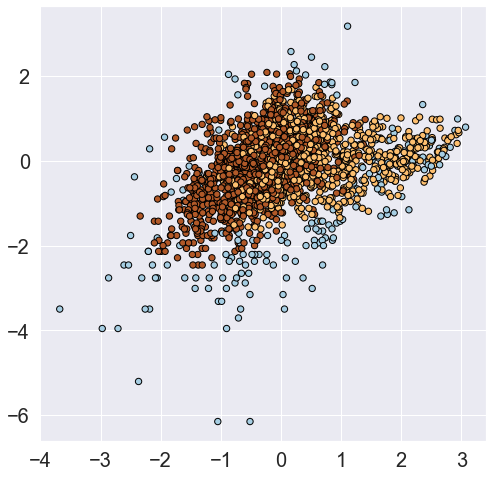

In [30]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))

plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= dbscan.labels_, cmap="Paired")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

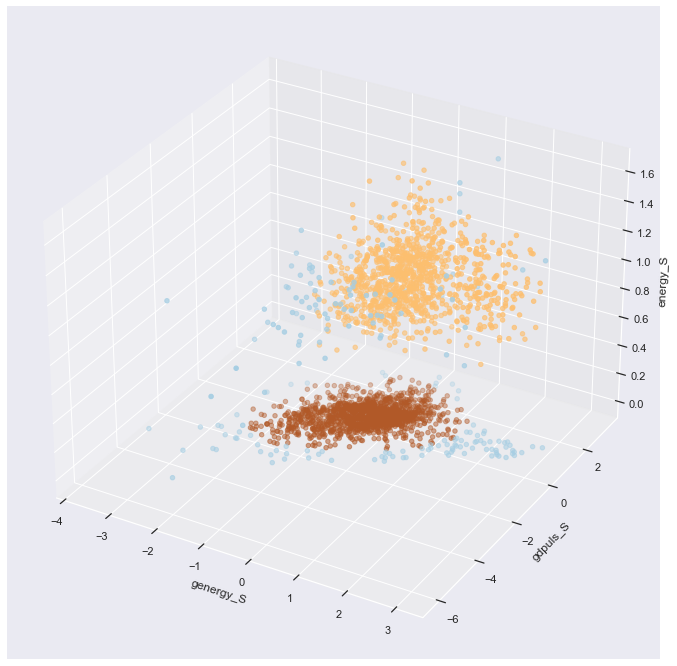

In [31]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = "energy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o', cmap="Paired")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

## Hierarchical

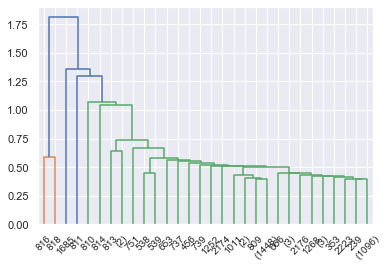

In [32]:
# Single
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='single')
res = dendrogram(data_link, truncate_mode='lastp')

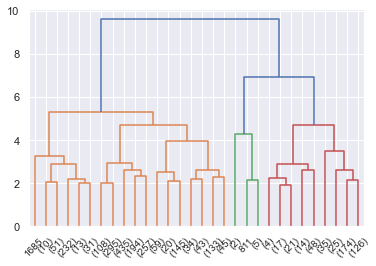

In [33]:
# Complete
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='complete')
res = dendrogram(data_link, truncate_mode='lastp')

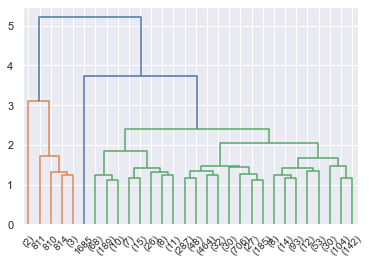

In [34]:
# Average
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='average')
res = dendrogram(data_link, truncate_mode='lastp')

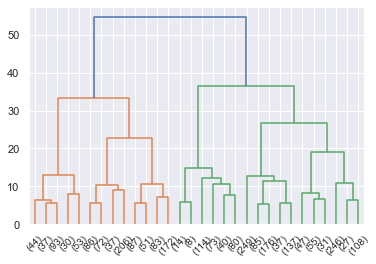

In [35]:
# ward
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='ward')
res = dendrogram(data_link, truncate_mode='lastp')

In [36]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 30):
    for l in linkages:
        for metr in metrics:
            if l == 'ward' and metr != 'euclidean':
                continue
            res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(df_1)
            results.append({'res': res, 'k': k,'silu': silhouette_score(df_1, res.labels_, metric = metr), 'link': l, 'metric': metr})
    print("end k = ", k)

end k =  2
end k =  3
end k =  4
end k =  5
end k =  6
end k =  7
end k =  8
end k =  9
end k =  10
end k =  11
end k =  12
end k =  13
end k =  14
end k =  15
end k =  16
end k =  17
end k =  18
end k =  19
end k =  20
end k =  21
end k =  22
end k =  23
end k =  24
end k =  25
end k =  26
end k =  27
end k =  28
end k =  29


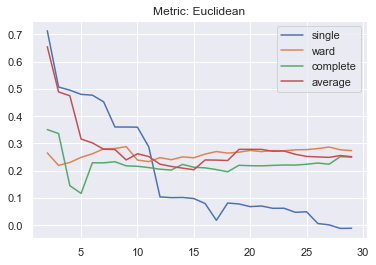

In [37]:
x = range(2, 30)
fig, ax = plt.subplots()

y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean')

ax.legend()

plt.show()